In [ ]:
# To perform Exploratory Data Analysis (EDA) on a given dataset.
# Apply suitable data preprocessing techniques on titanic dataset for training with machine learning algorithm:
# • Perform basic EDA using functions like head(), tail(), describe(), shape.
# • Identify & handle missing/Null value.
# • Check for duplicates and handle it.
# • Identify outliers & handle it.
# • Apply data encoding technique on suitable feature/attribute.
# • Apply Univariate, Bivariate & Multivariate analysis.
# • Apply feature scaling technique on suitable attribute.
# Split the dataset in the ratio of 80:20.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'titanic-dataset' dataset.
Path to dataset files: /kaggle/input/titanic-dataset


In [ ]:
import pandas as pd

data = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.shape

(891, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
missing_values = data.isnull().sum()
missing_percentage = (data.isnull().sum() / len(data)) * 100

missing_info = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})

missing_info = missing_info[missing_info['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False)

print("Missing Values Information:")
print(missing_info)

Missing Values Information:
          Missing Count  Missing Percentage
Cabin               687           77.104377
Age                 177           19.865320
Embarked              2            0.224467


In [ ]:
data[data.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.reset_index(drop=True, inplace=True)

In [ ]:
median = data['Age'].median()
data['Age'] = data['Age'].fillna(median)

In [ ]:
data['Embarked'] = data['Embarked'].fillna(str(data['Embarked'].mode()))
data['Cabin'] = data['Cabin'].fillna(str(data['Cabin'].mode()))

In [ ]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

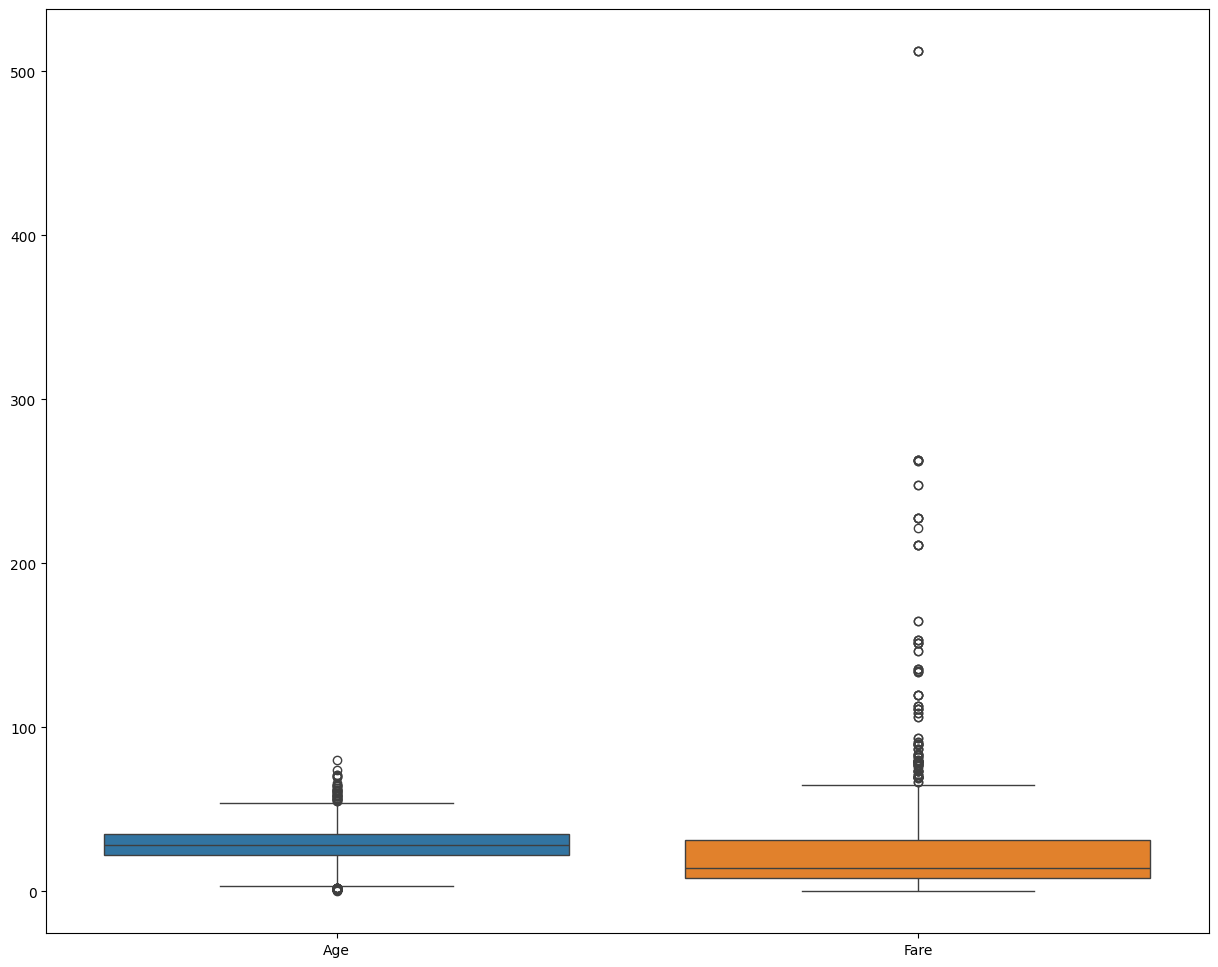

In [ ]:
plt.figure(figsize=(15,12))
sns.boxplot(data=data[['Age', 'Fare']])
plt.show()

In [ ]:
def detect_outliers_iqr(data):
    outlier_list = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data,75)
    iqr = q3 - q1
    lwr_bound = q1 - (1.5 * iqr)
    upr_bound = q3 + (1.5 * iqr)
    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outlier_list.append(i)
    return outlier_list

In [ ]:
for i in ['Age', 'Fare']:
  outliers = detect_outliers_iqr(data[i])
  print("outliers in", i, "attribute : ", outliers)

outliers in Age attribute :  [0.42, 0.67, 0.75, 0.75, 0.83, 0.83, 0.92, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 55.0, 55.0, 55.5, 56.0, 56.0, 56.0, 56.0, 57.0, 57.0, 58.0, 58.0, 58.0, 58.0, 58.0, 59.0, 59.0, 60.0, 60.0, 60.0, 60.0, 61.0, 61.0, 61.0, 62.0, 62.0, 62.0, 62.0, 63.0, 63.0, 64.0, 64.0, 65.0, 65.0, 65.0, 66.0, 70.0, 70.0, 70.5, 71.0, 71.0, 74.0, 80.0]
outliers in Fare attribute :  [66.6, 66.6, 69.3, 69.3, 69.55, 69.55, 69.55, 69.55, 69.55, 69.55, 69.55, 71.0, 71.0, 71.2833, 73.5, 73.5, 73.5, 73.5, 73.5, 75.25, 76.2917, 76.7292, 76.7292, 76.7292, 77.2875, 77.2875, 77.9583, 77.9583, 77.9583, 78.2667, 78.2667, 78.85, 78.85, 79.2, 79.2, 79.2, 79.2, 79.65, 79.65, 79.65, 80.0, 80.0, 81.8583, 82.1708, 82.1708, 83.1583, 83.1583, 83.1583, 83.475, 83.475, 86.5, 86.5, 86.5, 89.1042, 89.1042, 90.0, 90.0, 90.0, 90.0, 91.0792, 91.0792, 93.5, 93.5, 106.425, 106.425, 108.9, 108.9, 110.8833, 110.8833, 110.8833, 110.8833, 113.275, 113.275, 113.275, 

In [ ]:
data['Sex'] = data['Sex'].replace("male", 0)
data['Sex'] = data['Sex'].replace("female", 1)

/tmp/ipython-input-2114272724.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Sex'] = data['Sex'].replace("female", 1)


In [ ]:
data['Embarked'].unique()

array(['S', 'C', 'Q', '0    S\nName: Embarked, dtype: object'],
      dtype=object)

In [ ]:
data['Embarked'] = data['Embarked'].replace("S", 0)
data['Embarked'] = data['Embarked'].replace("C", 1)
data['Embarked'] = data['Embarked'].replace("Q", 2)
data['Embarked'] = data['Embarked'].replace("0    S\nName: Embarked, dtype: object", 0)

/tmp/ipython-input-939563116.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Embarked'] = data['Embarked'].replace("0    S\nName: Embarked, dtype: object", 0)


In [ ]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0 B96 B98\n1 C23 C25 C27\n2 ...,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0 B96 B98\n1 C23 C25 C27\n2 ...,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0 B96 B98\n1 C23 C25 C27\n2 ...,0
5,6,0,3,"Moran, Mr. James",0,28.0,0,0,330877,8.4583,0 B96 B98\n1 C23 C25 C27\n2 ...,2
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,0 B96 B98\n1 C23 C25 C27\n2 ...,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,0 B96 B98\n1 C23 C25 C27\n2 ...,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,0 B96 B98\n1 C23 C25 C27\n2 ...,1


<Axes: xlabel='Sex', ylabel='count'>

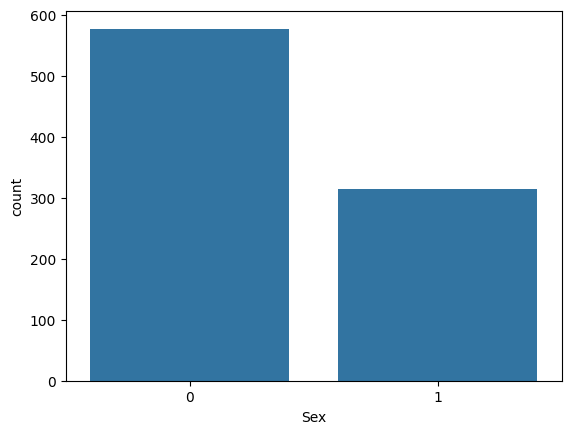

In [ ]:
sns.countplot(x = data["Sex"])

In [ ]:
gender = round(data['Sex'].value_counts().values[0]/891*100)

In [ ]:
print("Out of 891 {}% passengers are".format(gender), "male")

Out of 891 65% passengers are male


In [ ]:
gender = round(data['Sex'].value_counts().values[1]/891*100)

In [ ]:
print("Out of 891 {}% passengers are".format(gender), "female")

Out of 891 35% passengers are female


<Axes: xlabel='Fare', ylabel='count'>

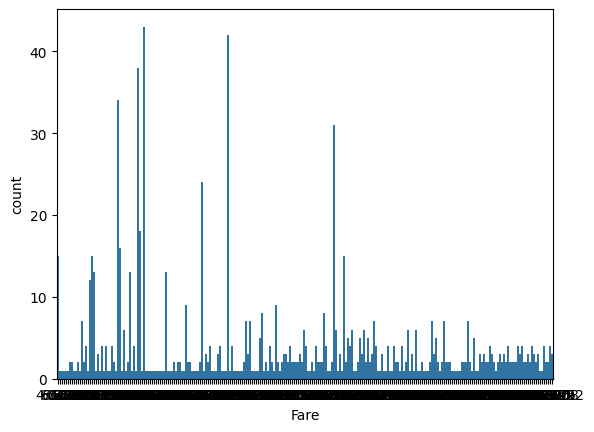

In [ ]:
sns.countplot(x = data["Fare"])

<Axes: xlabel='Age', ylabel='Count'>

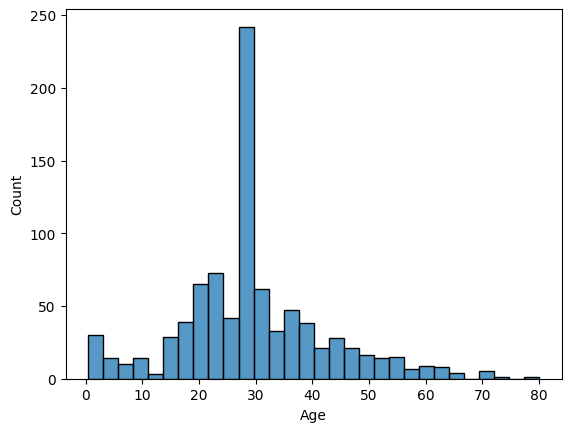

In [ ]:
sns.histplot(data['Age'])

<Axes: xlabel='Sex', ylabel='Age'>

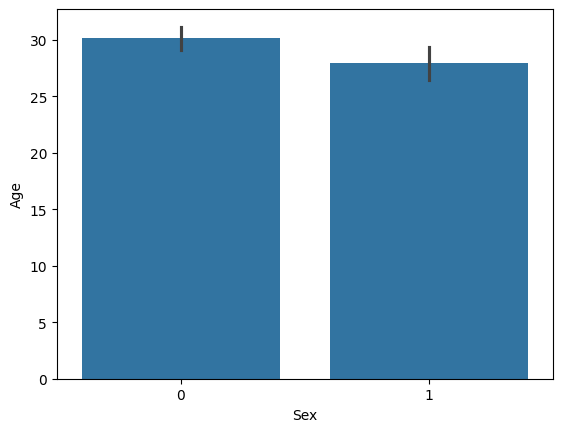

In [ ]:
sns.barplot(x = data['Sex'], y = data['Age'])

<Axes: xlabel='Age', ylabel='Fare'>

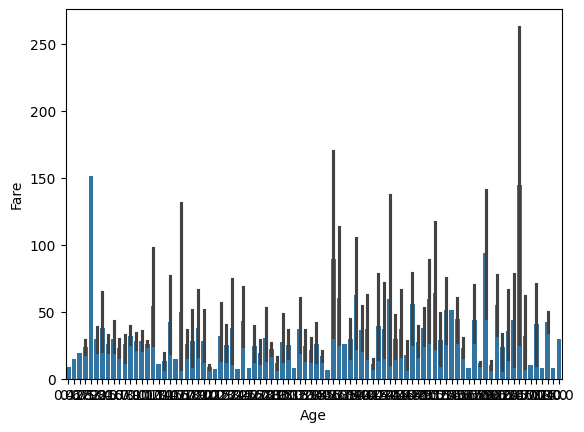

In [ ]:
sns.barplot(x = data['Age'], y = data['Fare'])

<Axes: xlabel='Age', ylabel='Fare'>

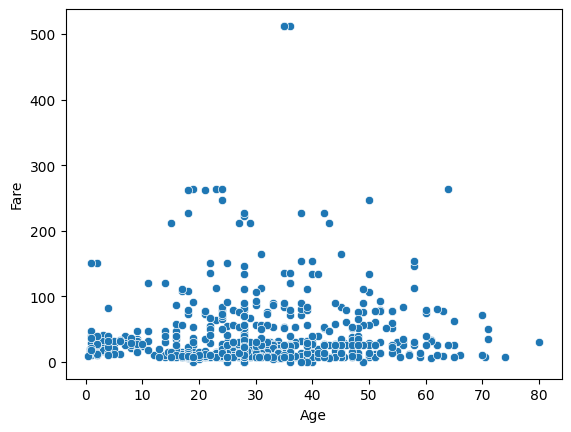

In [ ]:
sns.scatterplot(x = data['Age'], y = data['Fare'])

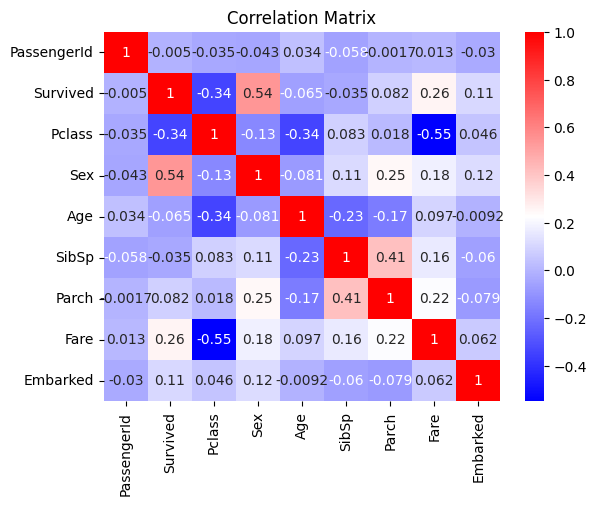

In [ ]:
sns.heatmap(data.corr(numeric_only = True), annot = True, cmap = 'bwr')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
corr_mat = data.corr(numeric_only=True)
corr_mat['Survived'].sort_values(ascending=False)

,Survived
Survived,1.000000
Sex,0.543351
Fare,0.257307
Embarked,0.106811
Parch,0.081629
PassengerId,-0.005007
SibSp,-0.035322
Age,-0.064910
Pclass,-0.338481


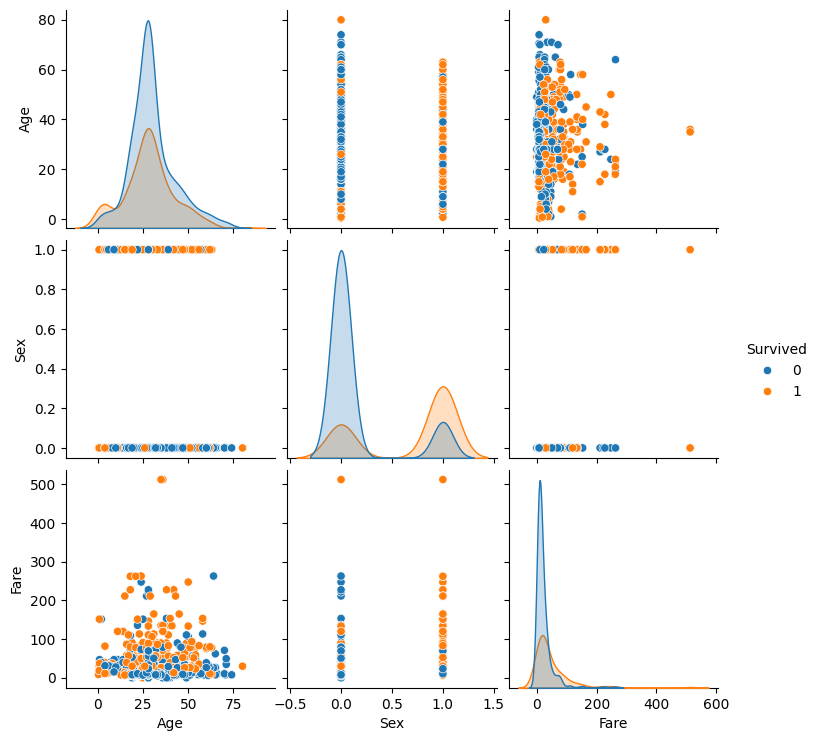

In [ ]:
sns.pairplot(data[['Age', 'Sex', 'Fare', 'Survived']], hue="Survived")

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
feature_cols = ["Age", "Sex", "Fare", "Embarked"]
X = data[feature_cols]
y = data["Survived"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape


(712, 4)

In [ ]:
X_test.shape

(179, 4)

In [ ]:
y_train.shape

(712,)

In [ ]:
y_test.shape

(179,)